In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
os.environ["OMP_NUM_THREADS"] = "4"
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats


In [47]:
# read preprocessed data
#data = pd.read_csv("data/preprocessedData.csv")
data = pd.read_csv("data/discretisedData.csv")

data = data.drop('Unnamed: 0', axis=1)  
#data = data.iloc[:1000]
# separate the predictors and the criterion variable
trainCrit = data['Heart_Disease']  
#data = data.drop('Heart_Disease', axis=1)  


In [48]:
data

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,1,0,0,0,0,0,0,0,1,1,3,0,0,0,1,0,2,2,2
1,4,1,0,1,0,0,0,1,0,1,3,1,1,2,0,0,2,0,1
2,4,1,1,0,0,0,0,1,0,1,3,0,1,3,0,1,0,0,2
3,1,1,1,1,0,0,0,1,0,0,3,2,2,2,0,0,2,2,2
4,3,1,0,0,0,0,0,0,0,0,3,2,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,4,1,1,0,0,0,0,0,0,0,1,1,1,2,0,1,2,1,0
308850,2,0,1,0,0,0,0,1,0,0,3,2,0,1,0,2,1,2,1
308851,4,0,1,0,0,0,1,1,0,1,1,0,0,1,1,1,2,1,1
308852,4,1,1,0,0,0,0,0,0,0,3,2,1,1,0,1,2,1,0


## PCA

[0.41680536 0.34190692 0.29939932 0.28056146 0.22259351 0.30010684
 0.19394596 0.31920569 0.47945335 0.49297907 0.512246   0.52199494
 0.71979546 0.57472309 0.22570645 0.31799422 0.25391874 0.2421595
 0.28896675]
                         Feature  Importance
12                   Weight_(kg)    0.102762
13                           BMI    0.082051
11                   Height_(cm)    0.074523
10                  Age_Category    0.073131
9                            Sex    0.070381
8                      Arthritis    0.068450
0                 General_Health    0.059506
1                        Checkup    0.048813
7                       Diabetes    0.045572
15           Alcohol_Consumption    0.045399
5                   Other_Cancer    0.042845
2                       Exercise    0.042744
18       FriedPotato_Consumption    0.041255
3                  Heart_Disease    0.040055
16             Fruit_Consumption    0.036251
17  Green_Vegetables_Consumption    0.034572
14               Smoki

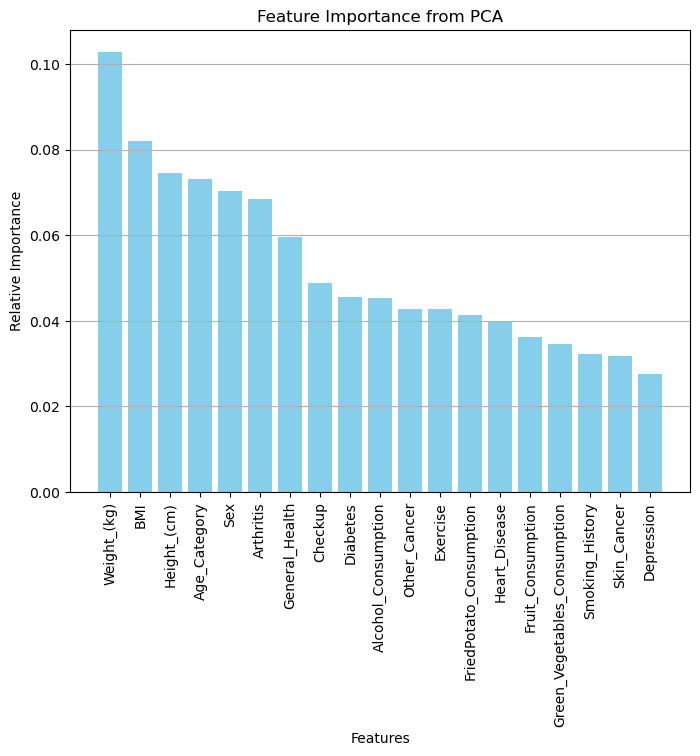

In [49]:
# scale data, so that all variables contribute equally
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA, get 2 principal components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

components = np.abs(pca.components_)  # Absolute value of eigenvectors
print(components.sum(axis=0))

# Compute total importance of each feature
feature_importance = components.sum(axis=0)
# Normalize importance (optional)
feature_importance_normalized = feature_importance / feature_importance.sum()
# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': data.columns,
    'Importance': feature_importance_normalized
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance from PCA')
plt.xlabel('Features')
plt.ylabel('Relative Importance')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

[[0.41328995 0.20678793 0.27719337 0.26710378 0.13350859 0.18748869
  0.14464191 0.31500367 0.34305376 0.00516159 0.31207587 0.03076439
  0.24917276 0.30255755 0.17801697 0.19630139 0.10128818 0.11965787
  0.02538502]
 [0.00355367 0.13768253 0.02254448 0.01366745 0.08638755 0.11373597
  0.04761535 0.00319098 0.13686587 0.4879771  0.2002425  0.49161136
  0.4708665  0.27227341 0.04748705 0.12250357 0.15307175 0.12247046
  0.25978233]]
                         Feature  Importance
0                 General_Health    0.108519
8                      Arthritis    0.090077
7                       Diabetes    0.082712
10                  Age_Category    0.081943
13                           BMI    0.079444
2                       Exercise    0.072784
3                  Heart_Disease    0.070134
12                   Weight_(kg)    0.065426
1                        Checkup    0.054297
15           Alcohol_Consumption    0.051544
5                   Other_Cancer    0.049230
14               Smokin

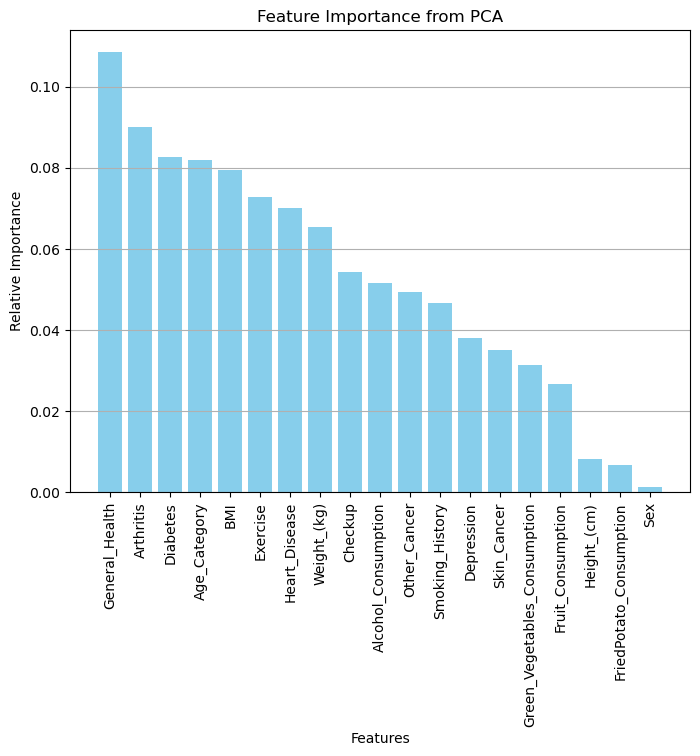

In [50]:
# scale data, so that all variables contribute equally
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA, get 2 principal components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

components = np.abs(pca.components_)  # Absolute value of eigenvectors
print(components)

# Compute total importance of each feature
feature_importance = components[0]
# Normalize importance (optional)
feature_importance_normalized = feature_importance / feature_importance.sum()
# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': data.columns,
    'Importance': feature_importance_normalized
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance from PCA')
plt.xlabel('Features')
plt.ylabel('Relative Importance')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

[[0.4128591  0.20733795 0.27736511 0.2677202  0.13362074 0.18698147
  0.14463915 0.31518614 0.34167161 0.00515534 0.31195053 0.03077379
  0.24932986 0.30275577 0.17877047 0.19699672 0.10158942 0.11929442
  0.02650741]
 [0.00340619 0.13721228 0.02204631 0.01421318 0.08988294 0.11221089
  0.04910822 0.00405172 0.13451492 0.48791238 0.19986658 0.49151609
  0.47061448 0.27201815 0.04710054 0.12258109 0.15277265 0.12205737
  0.26217069]]
                         Feature  Importance
11                   Height_(cm)    0.153827
9                            Sex    0.152699
12                   Weight_(kg)    0.147285
13                           BMI    0.085132
18       FriedPotato_Consumption    0.082050
10                  Age_Category    0.062551
16             Fruit_Consumption    0.047812
1                        Checkup    0.042942
8                      Arthritis    0.042098
15           Alcohol_Consumption    0.038363
17  Green_Vegetables_Consumption    0.038200
5                   Oth

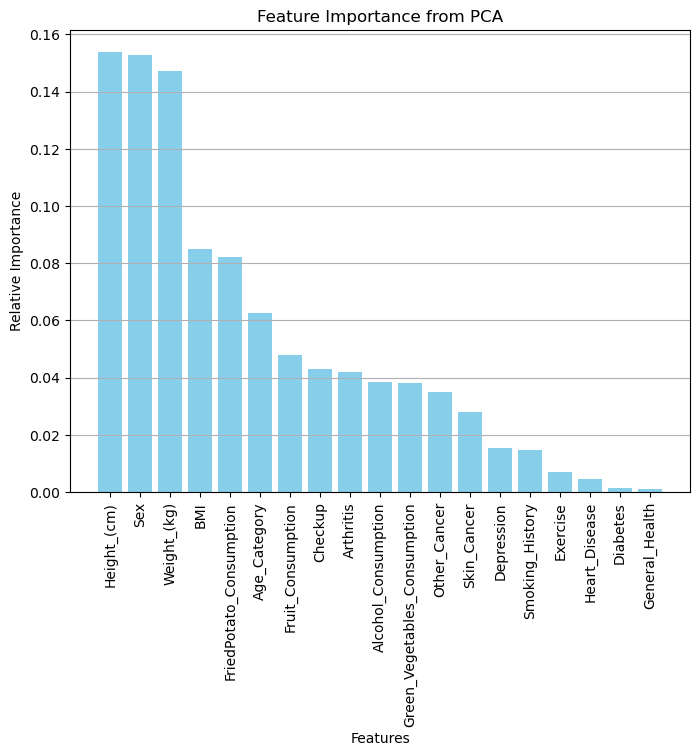

In [51]:
# scale data, so that all variables contribute equally
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply PCA, get 2 principal components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

components = np.abs(pca.components_)  # Absolute value of eigenvectors
print(components)

# Compute total importance of each feature
feature_importance = components[1]
# Normalize importance (optional)
feature_importance_normalized = feature_importance / feature_importance.sum()
# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': data.columns,
    'Importance': feature_importance_normalized
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance from PCA')
plt.xlabel('Features')
plt.ylabel('Relative Importance')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

## 1. K-means algorithm

### Find out the best k for k-means using the "elbow method"

In [52]:
data_kmeans = data.copy()
data_kmeans = data_kmeans.apply(lambda x: (x - x.min()) / (x.max() - x.min())) # Normalize the data
data_kmeans

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.000000,1.0,0.0,1.0,1.0,1.0
1,0.75,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.5,0.5,0.666667,0.0,0.0,1.0,0.0,0.5
2,0.75,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.5,1.000000,0.0,0.5,0.0,0.0,1.0
3,0.00,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.666667,0.0,0.0,1.0,1.0,1.0
4,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.5,0.333333,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,0.75,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.666667,0.0,0.5,1.0,0.5,0.0
308850,0.25,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.333333,0.0,1.0,0.5,1.0,0.5
308851,0.75,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.333333,1.0,0.5,1.0,0.5,0.5
308852,0.75,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.5,0.333333,0.0,0.5,1.0,0.5,0.0


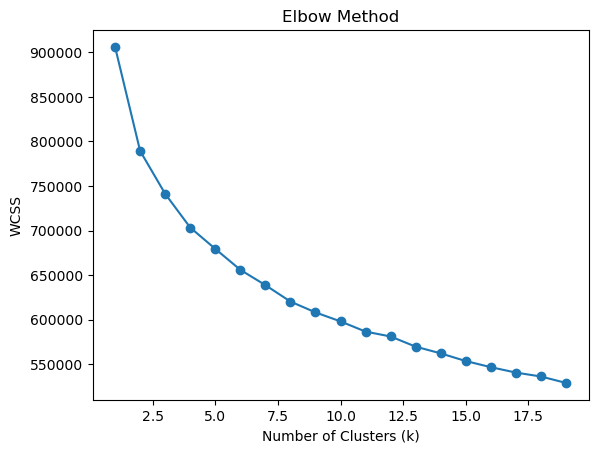

In [53]:
wcss = [] # wcss = Within-Cluster Sum of Squares, measures total variance within each cluster, which we aim to minimize
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # 10 rounds repeat (since performance dependend on random first centers)
    kmeans.fit(data_kmeans)
    wcss.append(kmeans.inertia_) # inertia is wcss for specific k
    
plt.plot(range(1, 20), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [54]:
# The optimal point for k seems to be k=3
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
# Fit the model
kmeans.fit(data_kmeans)
# Get the cluster assignments
y_kmeans = kmeans.predict(data_kmeans)
data_kmeans['Cluster assignment'] = y_kmeans

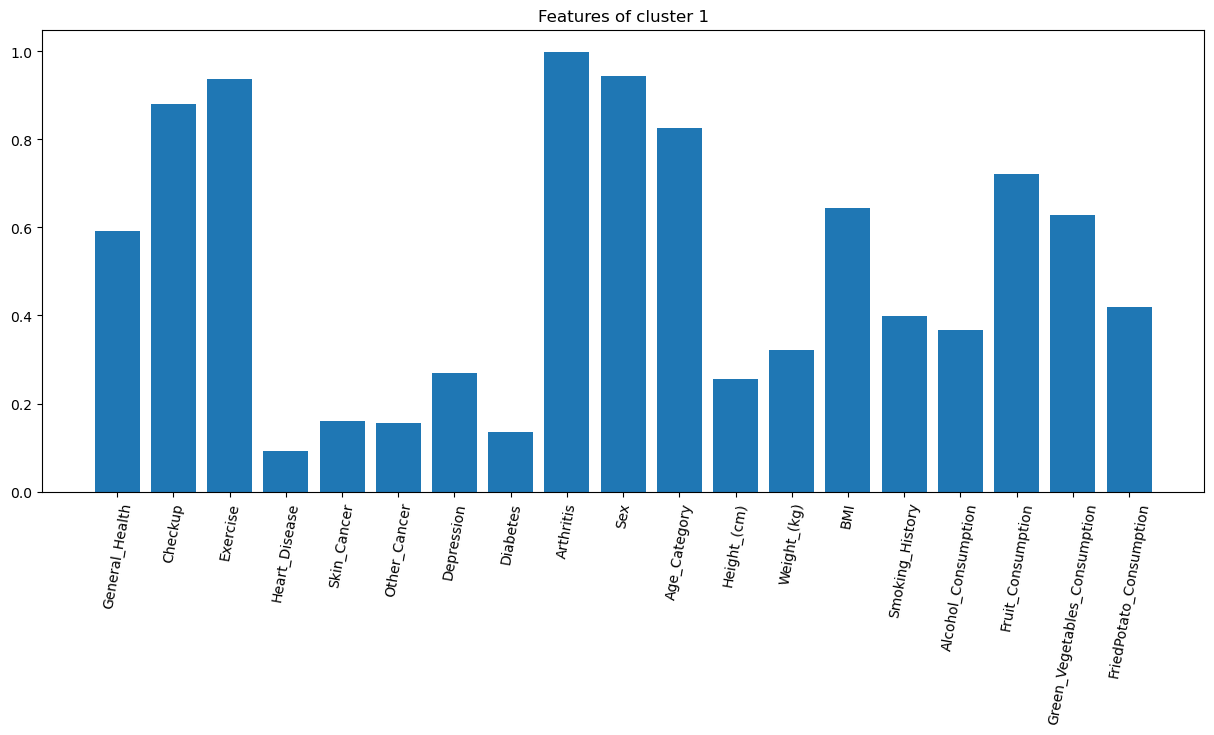

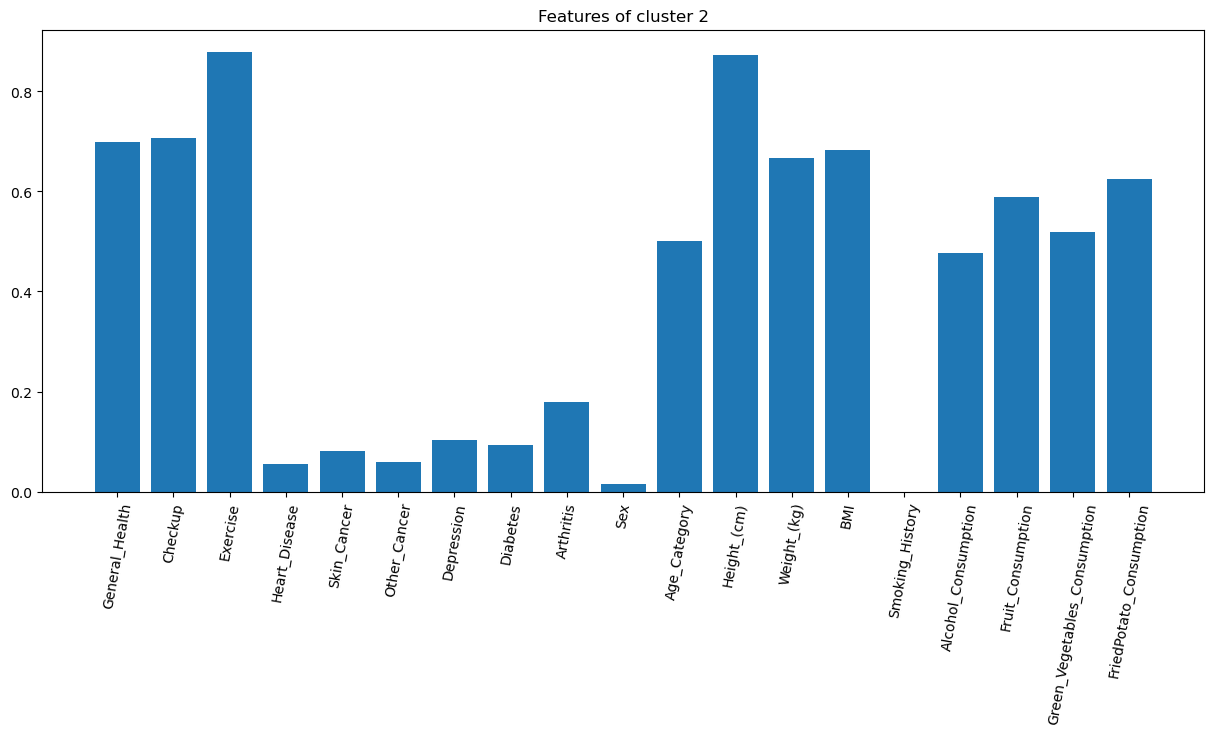

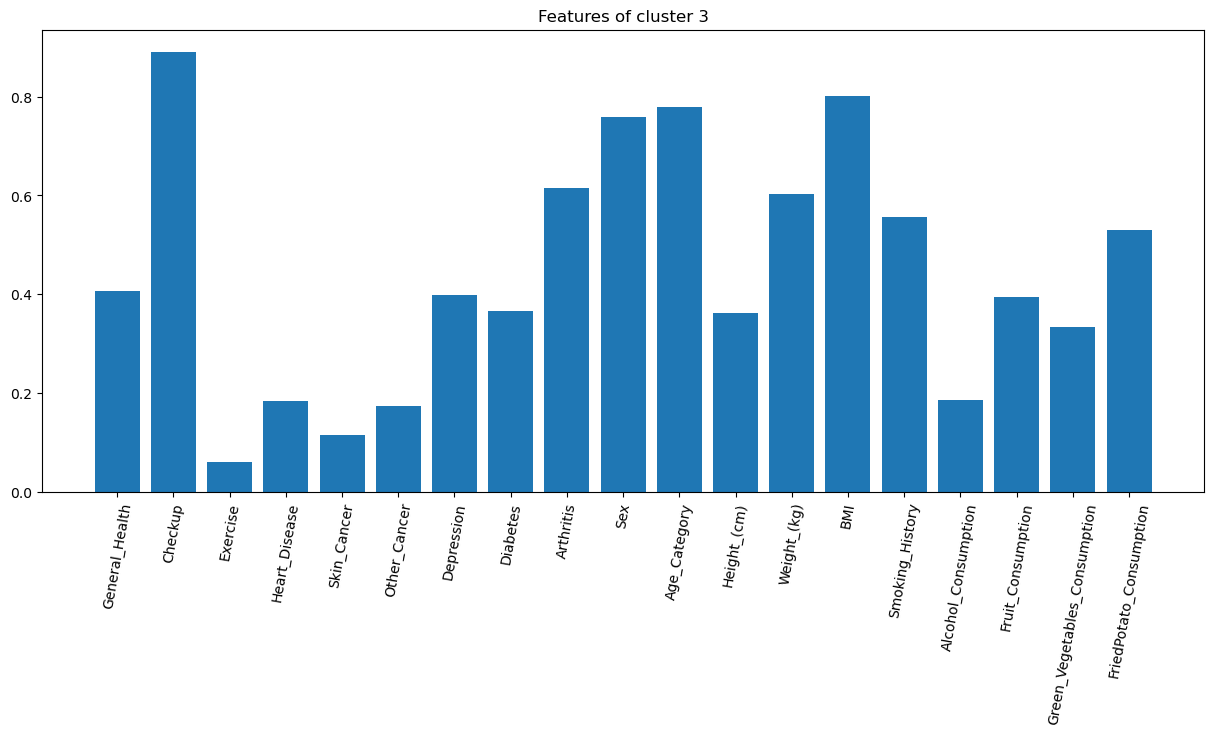

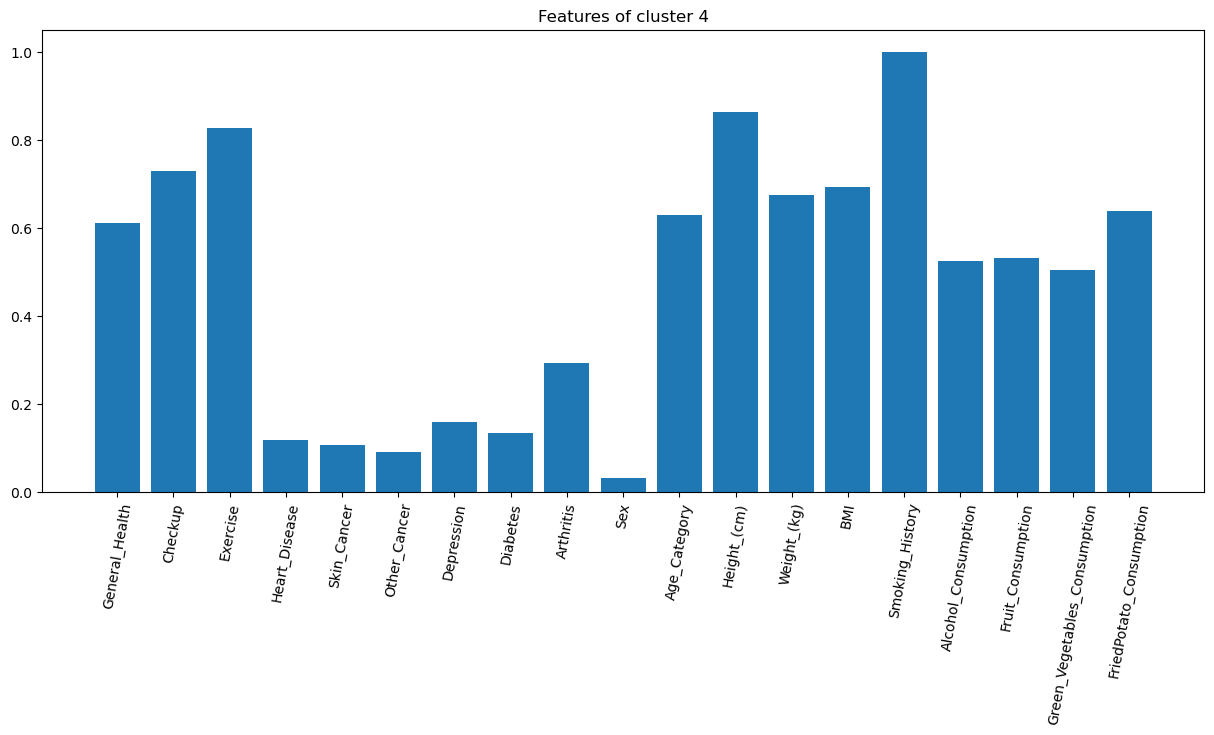

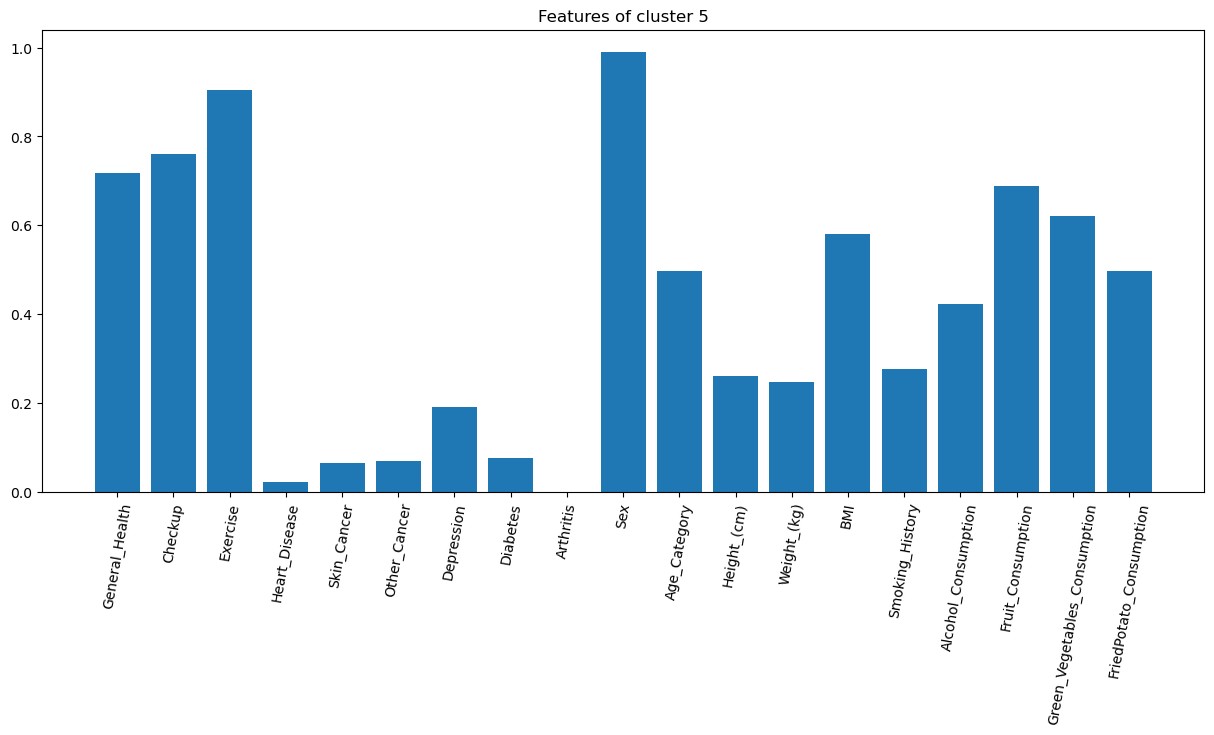

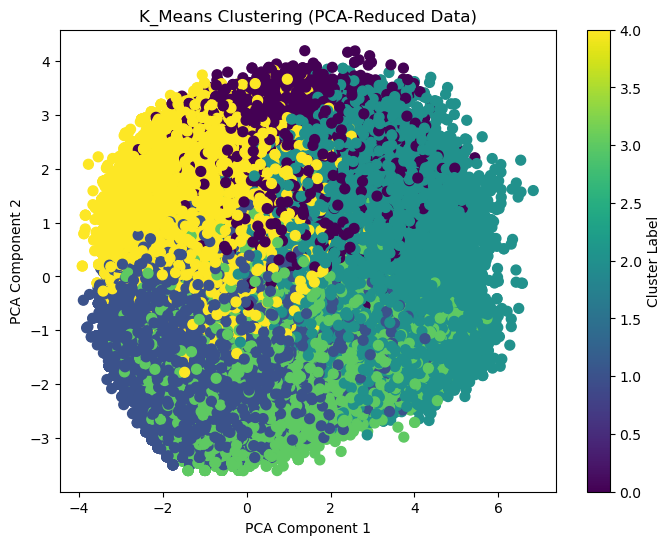

In [55]:
clusters = []
for i in range(0, max(data_kmeans['Cluster assignment']) + 1):
    clusters.append(np.mean(data_kmeans[data_kmeans['Cluster assignment'] == i], axis=0)[:-1])

for i in range(0, len(clusters)):
    plt.figure(figsize=(15, 6))
    plt.bar(clusters[i].index, clusters[i])
    plt.title(f"Features of cluster {i+1}")
    plt.xticks(rotation=80)  # Rotate the labels 45 degrees
    plt.show()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
X = np.array(scaled_data)
labels = data_kmeans['Cluster assignment']

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.colorbar(label='Cluster Label')
plt.title("K_Means Clustering (PCA-Reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

Sex                             0.978289
Depression                      0.114288
Arthritis                       0.097655
Fruit_Consumption               0.086342
Checkup                         0.079656
Green_Vegetables_Consumption    0.070075
Age_Category                    0.049043
Other_Cancer                    0.026465
Diabetes                        0.001434
Skin_Cancer                    -0.005020
General_Health                 -0.010222
Heart_Disease                  -0.038126
BMI                            -0.045026
Exercise                       -0.049940
Smoking_History                -0.072571
Alcohol_Consumption            -0.109763
FriedPotato_Consumption        -0.140065
Weight_(kg)                    -0.331226
Height_(cm)                    -0.597918
dtype: float64
11.5


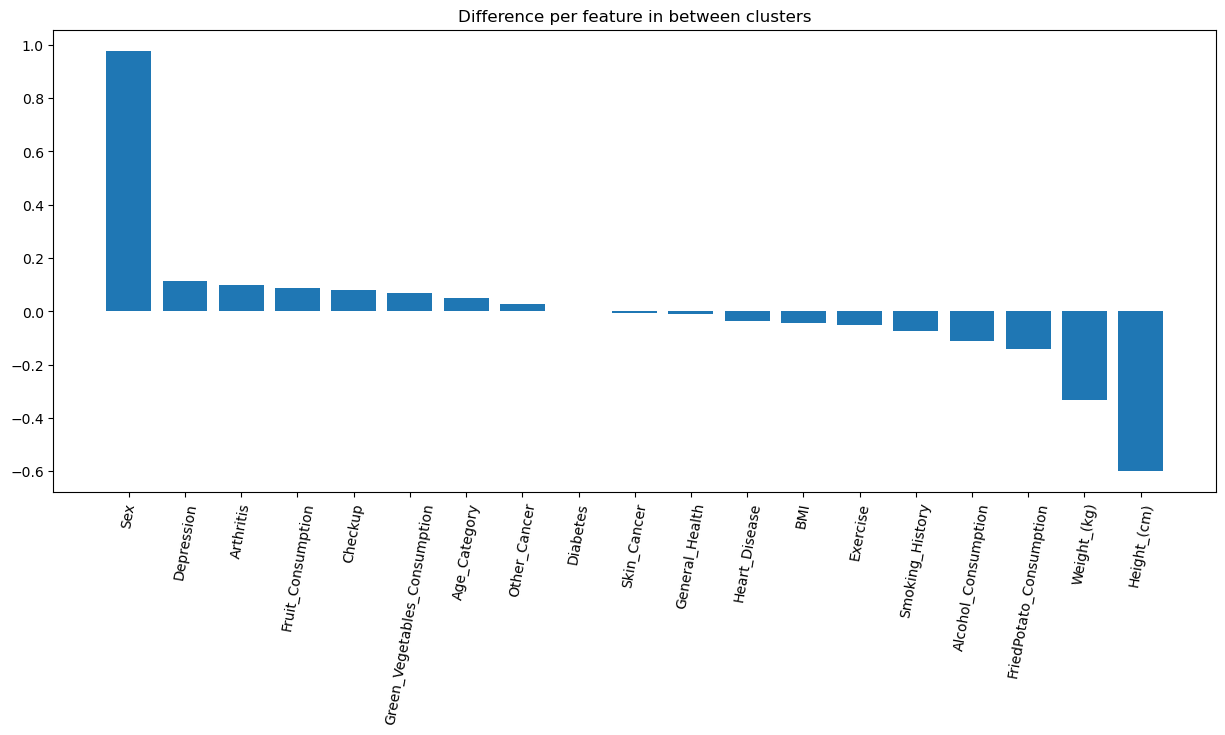

In [57]:
# only possible if k=2
# The optimal point for k seems to be k=3
kmeans = KMeans(n_clusters=2, random_state=13, n_init=10)
# Fit the model
kmeans.fit(data_kmeans)
# Get the cluster assignments
y_kmeans = kmeans.predict(data_kmeans)
data_kmeans['Cluster assignment'] = y_kmeans

clusters = []
for i in range(0, max(data_kmeans['Cluster assignment']) + 1):
    clusters.append(np.mean(data_kmeans[data_kmeans['Cluster assignment'] == i], axis=0)[:-1])

# get difference
s1, s2 = clusters    
difference = s2 -s1

difference = difference.sort_values(ascending=False)
print(difference)

x_position = list(difference.index).index("BMI")-0.5
print(x_position)
plt.figure(figsize=(15, 6))
plt.bar(difference.index, difference)
#plt.axvline(x=x_position, color='red', linestyle='--', linewidth=2)
plt.title(f"Difference per feature in between clusters")
plt.xticks(rotation=80)  # Rotate the labels 45 degrees
plt.show()

In [58]:
# see correlations between clusters and heart disease
pd.crosstab(data_kmeans['Cluster assignment'], trainCrit)
#print(clusters, data_kmeans['Cluster assignment'])

Heart_Disease,0,1
Cluster assignment,,
0,134003,14986
1,149880,9985


In [59]:
scipy.stats.spearmanr(data_kmeans['Cluster assignment'], trainCrit).correlation   # Spearman's rho

-0.06988492069519558

In [60]:
dataKMeans = data.copy()
dataKMeans["KMeans_Cluster"] = data_kmeans['Cluster assignment']
summariesGrouped = dataKMeans.groupby("KMeans_Cluster").agg(["mean"])
summariesGrouped

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
KMeans_Cluster,,,,,,,,,,,,,,,,,,,
0,3.551611,0.733799,0.800911,0.100585,0.099712,0.083040,0.141265,0.137889,0.276698,0.012310,2.165261,1.711146,1.332837,2.070542,0.443140,0.947728,1.106176,0.997879,1.246146
1,3.510725,0.813455,0.750971,0.062459,0.094692,0.109505,0.255553,0.139324,0.374353,0.990598,2.263347,0.515310,0.670384,1.935464,0.370569,0.728202,1.278860,1.138029,0.966015


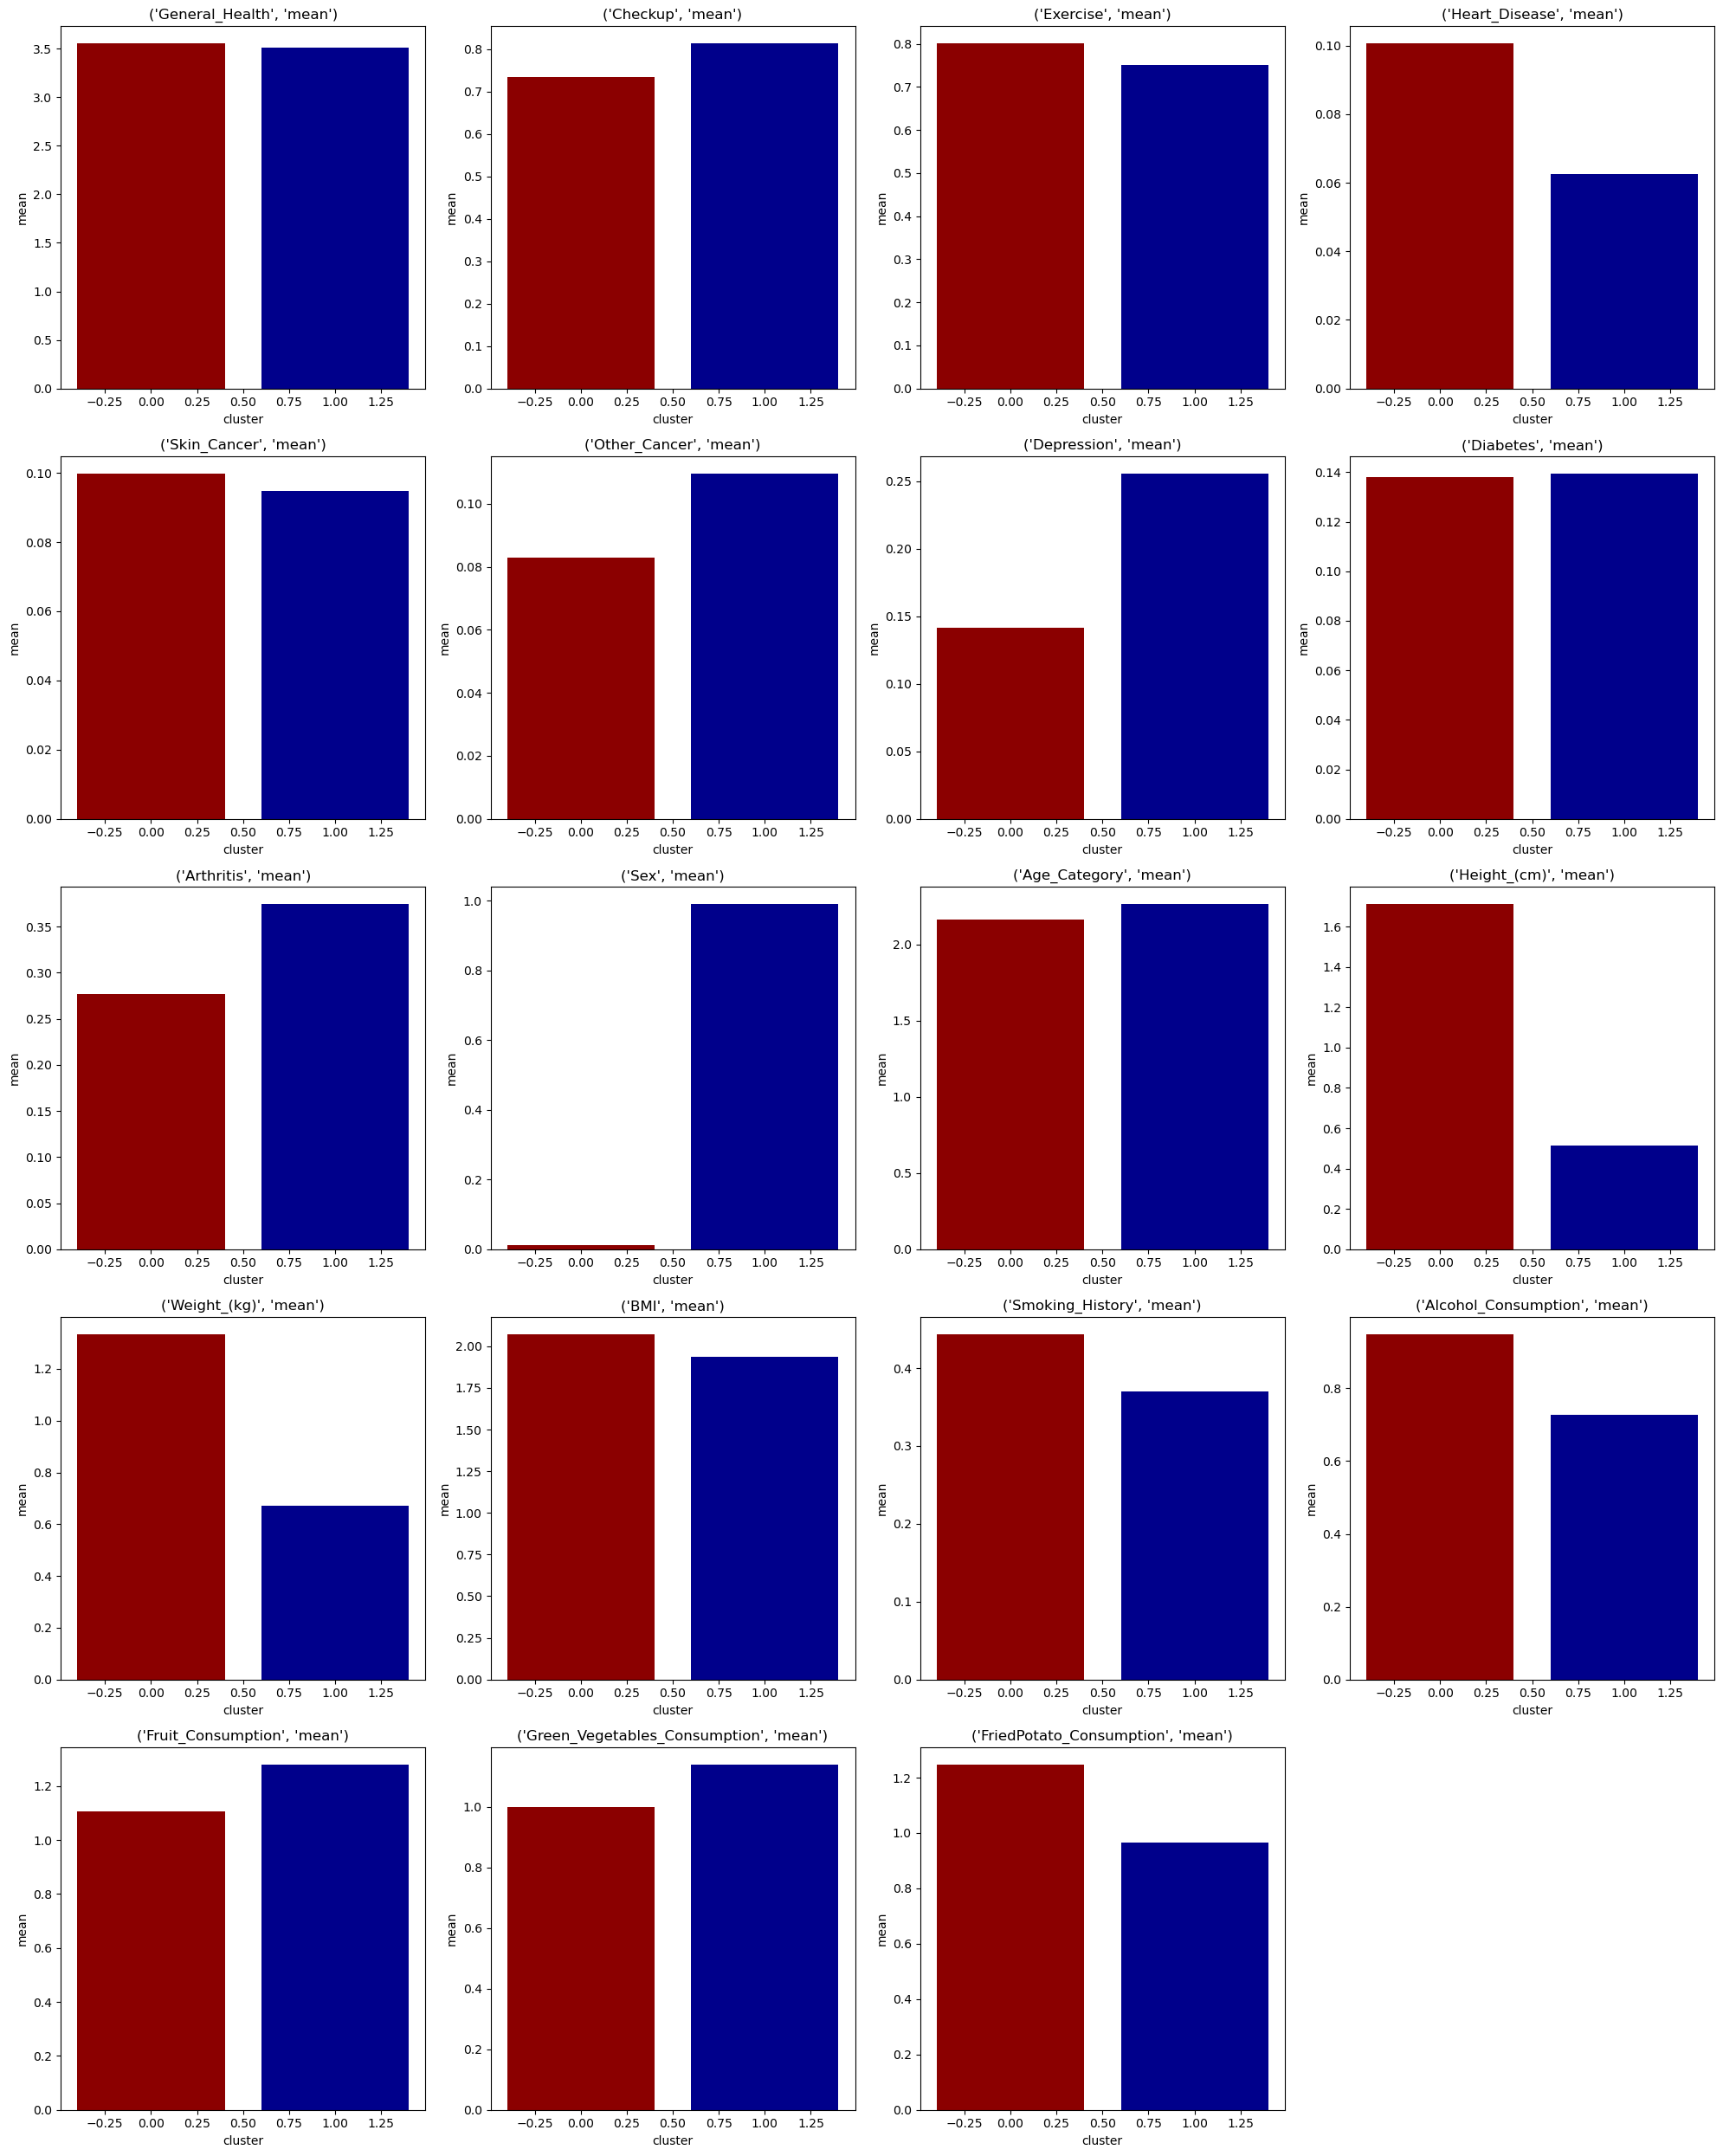

In [61]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))  
axes = axes.flatten()
for i, col in enumerate(summariesGrouped.columns):
    axes[i].bar(summariesGrouped.index[0], summariesGrouped[col].iloc[0], color='darkred')  # First bar
    axes[i].bar(summariesGrouped.index[1], summariesGrouped[col].iloc[1], color='darkblue')
    #axes[i].bar(summariesGrouped.index, summariesGrouped[col])  # Bar plot for each feature
    axes[i].set_title(col)  # Title for each subplot
    axes[i].set_xlabel('cluster')
    axes[i].set_ylabel('mean')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()

In [19]:
# ???
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data)
X_pca.shape

(1000, 2)

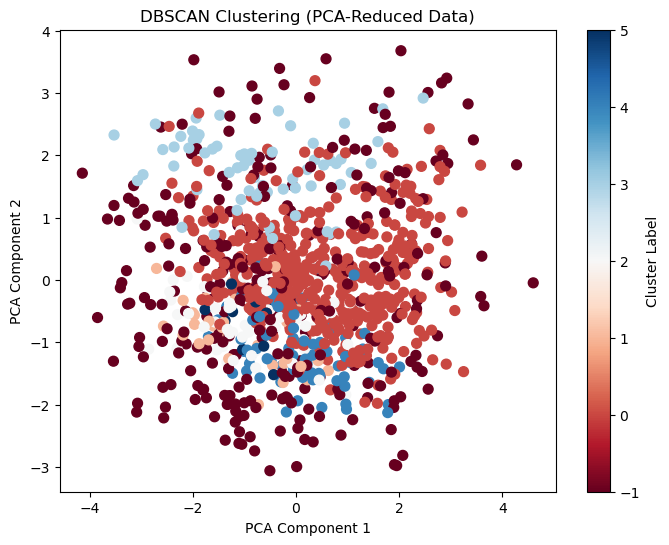

In [30]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
X = np.array(scaled_data)
#X, _ = make_blobs(n_samples=200, n_features=19, centers=3, random_state=42)

dbscan = DBSCAN(eps=2.5, min_samples=10)
labels = dbscan.fit_predict(X)
# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='RdBu', s=50)
plt.colorbar(label='Cluster Label')
plt.title("DBSCAN Clustering (PCA-Reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [33]:
columnsNewOrder = ['Heart_Disease', 'Alcohol_Consumption', 'Other_Cancer', 'Skin_Cancer','Depression', 'Diabetes',
                   'Smoking_History',  'Arthritis',
                    'Sex', 'General_Health', 'Exercise', 'Checkup',   
                    'Age_Category', 'BMI', ]

In [34]:
dataOrder = data[columnsNewOrder]
dataOrder["DBSCAN_Cluster"] = labels
summariesGrouped = dataOrder.groupby("DBSCAN_Cluster").agg(["mean"])
summariesGrouped

/var/folders/jp/7rxct1gj4xsc_51ldxz05w9w0000gn/T/ipykernel_48391/4121235119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataOrder["DBSCAN_Cluster"] = labels


,Heart_Disease,Alcohol_Consumption,Other_Cancer,Skin_Cancer,Depression,Diabetes,Smoking_History,Arthritis,Sex,General_Health,Exercise,Checkup,Age_Category,BMI
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
DBSCAN_Cluster,,,,,,,,,,,,,,
-1,0.333333,5.425170,0.309524,0.329932,0.346939,0.309524,0.517007,0.534014,0.564626,2.908163,0.557823,4.520408,66.363946,29.337483
0,0.000000,1.735808,0.000000,0.000000,0.000000,0.218341,0.314410,0.427948,0.718341,3.368996,0.650655,4.897380,65.960699,28.266878
1,1.000000,0.593750,0.000000,0.000000,0.000000,0.406250,0.875000,0.593750,0.218750,2.343750,0.687500,5.000000,69.656250,26.350313
2,0.000000,0.234375,1.000000,0.000000,0.000000,0.281250,0.218750,0.656250,0.875000,2.968750,0.421875,4.921875,74.109375,27.787969
3,0.000000,0.768116,0.000000,0.000000,1.000000,0.275362,0.478261,0.739130,0.942029,2.623188,0.507246,4.927536,60.463768,29.999275
4,0.000000,0.777778,0.000000,1.000000,0.000000,0.083333,0.305556,0.583333,0.763889,3.500000,0.611111,4.930556,73.666667,27.545694
5,1.000000,0.909091,0.000000,0.000000,0.000000,0.090909,0.000000,0.909091,0.909091,2.909091,0.818182,5.000000,73.818182,28.445455


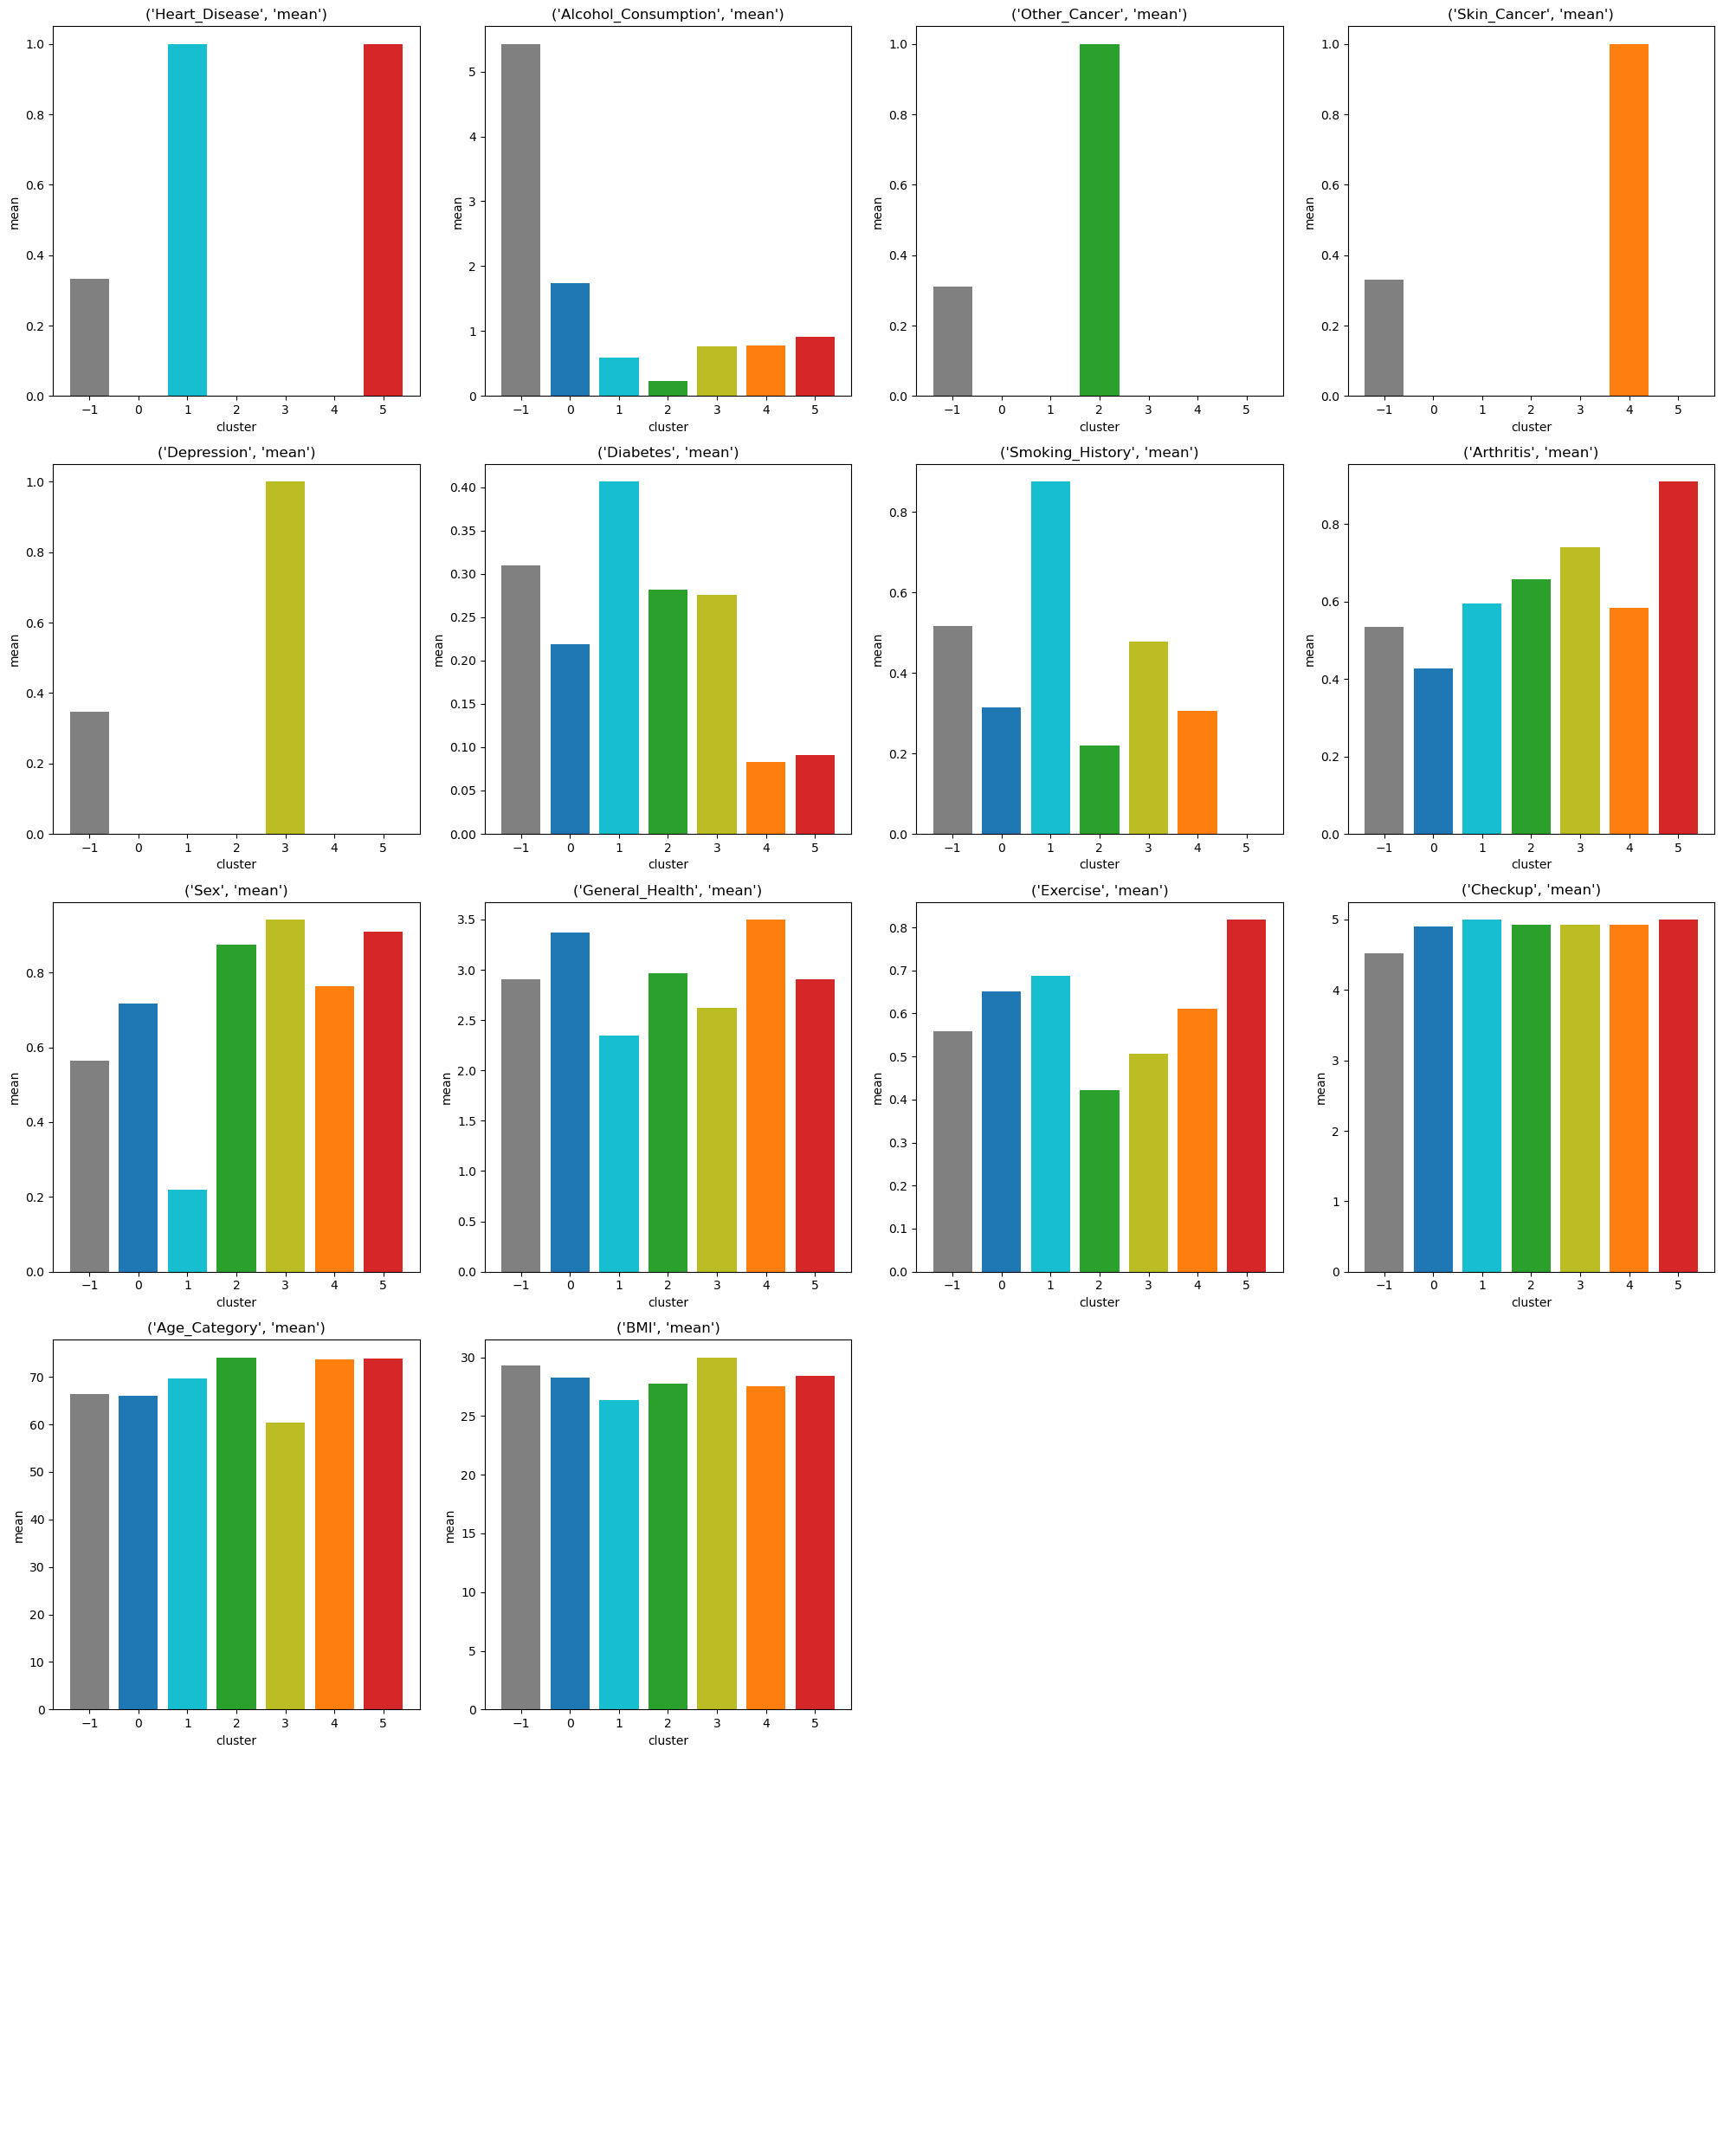

In [44]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))  
axes = axes.flatten()
for i, col in enumerate(summariesGrouped.columns):
    axes[i].bar(summariesGrouped.index[0], summariesGrouped[col].iloc[0], color='grey') 
    axes[i].bar(summariesGrouped.index[1], summariesGrouped[col].iloc[1], color='tab:blue')  
    axes[i].bar(summariesGrouped.index[2], summariesGrouped[col].iloc[2], color='tab:cyan')
    axes[i].bar(summariesGrouped.index[3], summariesGrouped[col].iloc[3], color='tab:green')  
    axes[i].bar(summariesGrouped.index[4], summariesGrouped[col].iloc[4], color='tab:olive') 
    axes[i].bar(summariesGrouped.index[5], summariesGrouped[col].iloc[5], color='tab:orange')  
    axes[i].bar(summariesGrouped.index[6], summariesGrouped[col].iloc[6], color='tab:red')  


    #axes[i].bar(summariesGrouped.index, summariesGrouped[col])  # Bar plot for each feature
    axes[i].set_title(col)  # Title for each subplot
    axes[i].set_xlabel('cluster')
    axes[i].set_ylabel('mean')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()

In [198]:
pd.crosstab(labels, trainCrit)


Heart_Disease,0,1
row_0,,
-1,351,141
0,508,0


In [199]:
scipy.stats.spearmanr(labels, trainCrit).correlation   

-0.4116823795949804